# Quantum mechanical scattering

This notebook covers a numerical calculation of the elastic scattering of a non-relativistic quantum particle by a potential, based on the Born series. The key quantity of interest is the scattering amplitude, $f(\mathbf{k}_i\rightarrow\mathbf{k}_f)$, which describes the quantum amplitude for an incoming plane wave with wavevector $\mathbf{k}_i$ to scatter into wavevector $\mathbf{k}_f$.

## Born series: theory

The Born series formula for the scattering amplitude, to second order and for 3D space, is

$$f(\mathbf{k}_i\rightarrow \mathbf{k}_f) \approx - \frac{2m}{\hbar^2} \,\cdot \, 2\pi^2 \, \Bigg[\big\langle \mathbf{k}_f\big| \hat{V}\big|\mathbf{k}_i\big\rangle + \big\langle \mathbf{k}_f \big| \hat{V}\hat{G}_0 \hat{V} \big|\mathbf{k}_i\big\rangle + \cdots \Bigg].$$

The particle mass is $m$, the scattering potential operator is $\hat{V}$, and $|\mathbf{k}\rangle$ denotes a momentum eigenstate corresponding to wavevector $\mathbf{k}$.  In the position basis,

$$\langle \mathbf{r}|\mathbf{k}\rangle = \frac{e^{i\mathbf{k}\cdot \mathbf{r}}}{(2\pi)^{3/2}}.$$

Hence,

$$\begin{aligned}\big\langle \mathbf{k}_f\big| \hat{V}\big|\mathbf{k}_i\big\rangle &= \int d^3r_1\; \frac{\exp(-i\mathbf{k}_f \cdot \mathbf{r}_1)}{(2\pi)^{3/2}} \, V(\mathbf{r}_1) \, \frac{\exp(i\mathbf{k}_i \cdot \mathbf{r}_1)}{(2\pi)^{3/2}} \\ &= \frac{1}{(2\pi)^3} \int d^3r_1\; V(\mathbf{r}_1) \; \exp\Big[i(\mathbf{k}_i-\mathbf{k}_f) \cdot \mathbf{r}_1\Big] \end{aligned} \qquad \mathrm{where}\; |\mathbf{k}_i| = |\mathbf{k}_f| = k.$$

Likewise,

$$\big\langle \mathbf{k}_f\big| \hat{V} \hat{G}_0\hat{V}\big|\mathbf{k}_i\big\rangle = - \frac{1}{(2\pi)^3} \frac{2m}{\hbar^2} \int d^3r_1 d^3r_2 \; V(\mathbf{r}_1) \; V(\mathbf{r}_2) \; \exp\Big[i\big(\mathbf{k}_i\cdot \mathbf{r}_1 - \mathbf{k}_f \cdot \mathbf{r}_2\big)\Big] \; \frac{\exp[ik|\mathbf{r}_1 - \mathbf{r}_2|]}{4\pi|\mathbf{r}_1 - \mathbf{r}_2|}$$

An expedient way to calculate these integrals is [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration). Suppose we want to compute an integral of the form
\begin{equation}
  I = \int_{V} d^3r \, F(\mathbf{r}),
\end{equation}
taken over some domain of volume $V$.  We randomly sample $N$ points, $\{F_1, F_2, \dots, F_N\}$.  Then the estimate for the integral is

$$I \,\approx\, \frac{V}{N} \sum_{n=1}^N F_n.$$




## Born series: code

We will assume computational units, $m = \hbar = 1$. Note that the code will be written for clarity, not performance; feel free to optimize it.

First, we import the [Scipy](https://scipy.org/) libraries, and the [Matplotlib](https://matplotlib.org/) library for plotting. Next, we write a function to calculate the two terms of the Born series via Monte Carlo integration:

In [2]:
from scipy import *
import matplotlib.pyplot as plt

## Estimate the scattering amplitude f.
##
## Vfun   -- function that takes an array [x, y, z] and returns the potential V(x,y,z)
## ki, kf -- initial and final wavevectors.  Their magnitudes are assumed to be equal
## L      -- size of box in which to sample points.  Each coordinate is drawn from [-L, L]
## N      -- number of Monte Carlo runs

def f_monte_carlo(Vfun, ki, kf, L, N=5000):
    
    assert abs(dot(ki,ki) - dot(kf,kf)) < 1e-5    # ki and kf should have same magnitudes

    volume = (2*L)**3    # Spatial volume of integration
    f1, f2 = 0.0, 0.0    # First and second order contributions to f

    for jj in ranger(N):
        f1 += sample_f1(Vfun, ki, kf, L)
        f2 += sample_f2(Vfun, ki, kf, L)

    ## Note that f2 is a double integral with hypervolume V**2
    return (1/N) * (volume * f1 + volume**2 * f2)

Observe that `f_monte_carlo` calls two subroutines, `sample_f1` and `sample_f2`. These are responsible for drawing random samples

$$\begin{aligned}f_1 &\;\;\leftarrow\;\; - \frac{1}{2\pi} V(\mathbf{r}_1) \; \exp\Big[i(\mathbf{k}_i-\mathbf{k}_f) \cdot \mathbf{r}_1\Big] \\ f_2 &\;\;\leftarrow\;\;  \frac{1}{4\pi^2} V(\mathbf{r}_1) \; V(\mathbf{r}_2) \; \exp\Big[i\big(\mathbf{k}_i\cdot \mathbf{r}_1 - \mathbf{k}_f \cdot \mathbf{r}_2\big)\Big] \; \frac{\exp[ik|\mathbf{r}_1 - \mathbf{r}_2|]}{|\mathbf{r}_1 - \mathbf{r}_2|}\end{aligned}$$

where each $\mathbf{r}_1$ and $\mathbf{r}_2$ is a position drawn from a cube of side $2L$, centered at the origin (i.e., each coordinate is drawn from a uniform distribution between $-L$ and $L$).

Here is the code for `sample_f1`:

In [3]:
def sample_f1(Vfun, ki, kf, L):
    r1 = 2 *L * (random.random(3) - 0.5)   # Each coordinate is -L to L
    V  = Vfun(r1)
    return - V * exp(1j * dot(ki - kf, r1)) / (2*pi)

**Task 1 (10 marks)**: Fill in the code for `sample_f2`:

In [7]:
def sample_f2(Vfun, ki, kf, L):
    # Fill in code here
    return 0.0 # FIXME. Returning 0 means to retain only first-order Born.

## Born series: plotting

We can now use the `f_monte_carlo` function to study how scattering amplitude varies. First, let us define a simple scattering potential of the form

$$V(\mathbf{r}) = \begin{cases}0.1, & |\mathbf{r}| < 1 \\ 0 & \mathrm{otherwise}\end{cases}$$

In [5]:
def V1(r):
    return 0.1 if abs(dot(r,r)) < 1.0 else 0.0

The following code plots the energy dependence of the scattering amplitude for 90-degree deflection angles:

IntProgress(value=0, max=20)

Text(0, 0.5, '|f|^2')

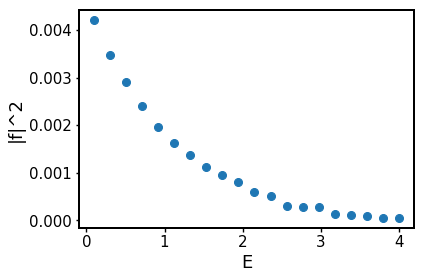

In [6]:
from ipywidgets import IntProgress # For progress reporter
from IPython.display import display

nd   = 20
Emin = 0.1
Emax = 4.0
L    = 1.0

progress_bar = IntProgress(min=0, max=nd)
display(progress_bar)

Evec = linspace(Emin, Emax, nd)        # array of energies
fvec = zeros(len(Evec), dtype=complex) # scattering amplitudes to calculate

for n in range(nd):
    ## For each E, ki is in the z direction and kf in the x direction.
    k  = sqrt(2*Evec[n])
    ki = array([0,0,k])
    kf = array([k,0,0])
    
    fvec[n] = f_monte_carlo(V1, ki, kf, L)
    progress_bar.value += 1

## Plot the differential scattering cross section
plt.plot(Evec, abs(fvec)**2, 'o')
plt.xlabel('E'); plt.ylabel('|f|^2')

**Task 2 (10 marks)**: Write code to plot $|f|^2$ versus deflection angle at fixed $E$.

**Task 3 (optional)**: Modify the above code to show also the exact result obtained from partial wave analysis, so as to see how well the Born approximation works. The answer from partial wave analysis is

$$\begin{aligned}f(\mathbf{k}_i \rightarrow k\hat{\mathbf{r}}) &= \frac{1}{2ik}\, \sum_{\ell =0}^\infty \big(e^{2i\delta_\ell} - 1\big) \big(2\ell+1\big)\, P_{\ell}(\hat{\mathbf{k}}_i\cdot \hat{\mathbf{r}}) \\ \delta_\ell &= \frac{\pi}{2} + \mathrm{arg}\!\left[k{h_\ell^+}'(kR) \, j_\ell(qR) - qh_\ell^+(kR)\, j_\ell'(qR)\right] \\ k &= |\mathbf{k}_i| = \sqrt{2mE/\hbar^2}, \;\; q = \sqrt{2m(E+U)/\hbar^2}.\end{aligned}$$

You can use [`scipy.special.lpmv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html) to compute Legendre polynomials, and [`scipy.special.spherical_jn`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html) to compute spherical Bessel functions of the first kind ($j_\ell$) and its first derivative ($j_\ell'$). To calculate the spherical Hankel functions ($h_\ell^+$) and its derivative (${h_\ell^+}'$), use the identity

$$h_\ell = j_\ell + i y_\ell$$

where $j_\ell$ is the spherical Bessel function of the first kind, and $y_\ell$ is the spherical Bessel function of the second kind, which can be computed with [`scipy.special.yn`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_yn.html).